# Altruism and Lying-Aversion – Power Analysis

This power analysis looks at the weakest test that we plan on using in our analysis, that being the Kolmogorov-Smirnov Test.  We use this test to evaluate the deviation in the density of choices from the expected uniform distribution, 1-5, of our modified dice-roll, lying-dictator game.

## Imports

In [1]:
import matplotlib.pyplot as plt
from power_analysis_utils import (ks_power_analysis_custom_distributions, 
                                  ks_power_analysis_custom_distributions_with_recording,
                                  ks_power_analysis_extreme_cases,
                                  ks_power_analysis_extreme_prior,
                                  ks_power_analysis_bimodal,
                                  chi_squared_power_analysis_extreme_cases,
                                  chi_squared_power_analysis_extreme_prior,
                                  chi_squared_power_analysis_bimodal)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## K-S

In [2]:
# Estimate the sample size needed for the custom distributions
estimated_sample_size_custom, achieved_power_custom = ks_power_analysis_custom_distributions()
estimated_sample_size_custom, achieved_power_custom

/Users/aaronberman/Desktop/Altruism & Lying Aversion/src/power_analysis_utils.py:43: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  _, p_value = stats.ks_2samp(null_sample, alt_sample)


(450, 0.827)

/Users/aaronberman/Desktop/Altruism & Lying Aversion/src/power_analysis_utils.py:73: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  _, p_value = stats.ks_2samp(null_sample, alt_sample)


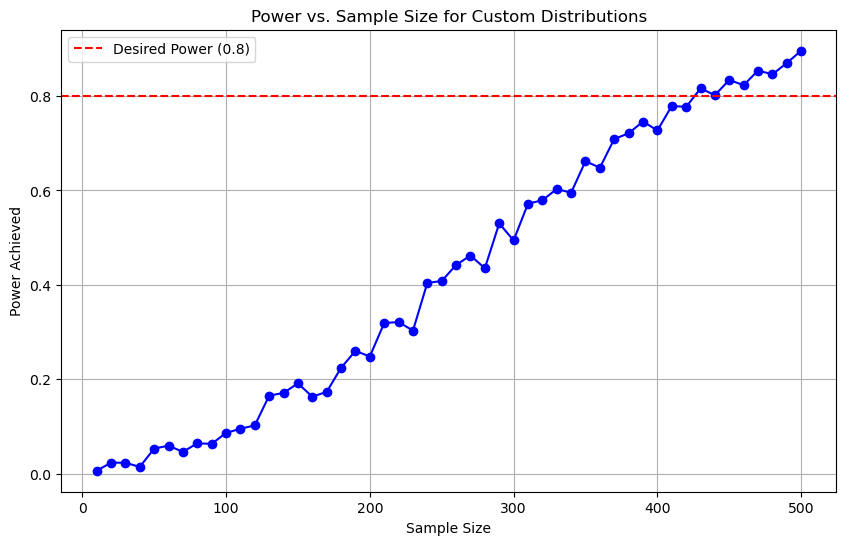

In [3]:
# Record the power achieved at each sample size
sample_sizes_recorded, powers_recorded = ks_power_analysis_custom_distributions_with_recording()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes_recorded, powers_recorded, marker='o', linestyle='-', color='b')
plt.title('Power vs. Sample Size for Custom Distributions')
plt.xlabel('Sample Size')
plt.ylabel('Power Achieved')
plt.axhline(y=0.8, color='r', linestyle='--', label='Desired Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()

/Users/aaronberman/Desktop/Altruism & Lying Aversion/src/power_analysis_utils.py:101: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  _, p_value = stats.ks_2samp(null_sample, alt_sample)


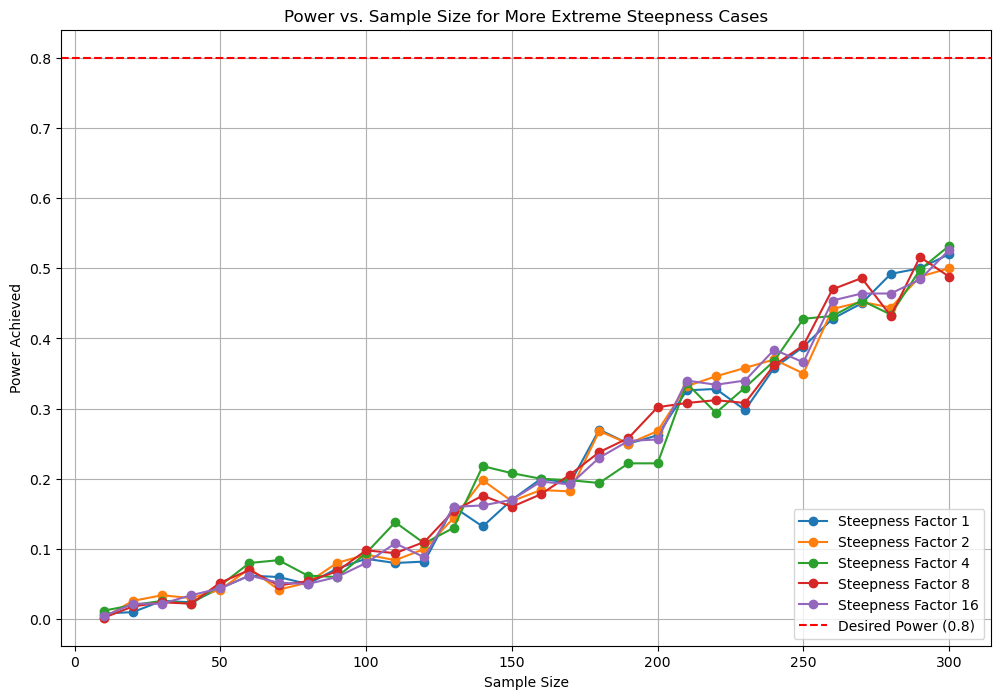

In [4]:
# Perform the analysis with more extreme steepness factors
results_extreme_cases = ks_power_analysis_extreme_cases()

# Plotting for the more extreme cases
plt.figure(figsize=(12, 8))
for factor, sizes, powers in results_extreme_cases:
    plt.plot(sizes, powers, marker='o', linestyle='-', label=f'Steepness Factor {factor}')

plt.title('Power vs. Sample Size for More Extreme Steepness Cases')
plt.xlabel('Sample Size')
plt.ylabel('Power Achieved')
plt.axhline(y=0.8, color='r', linestyle='--', label='Desired Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()

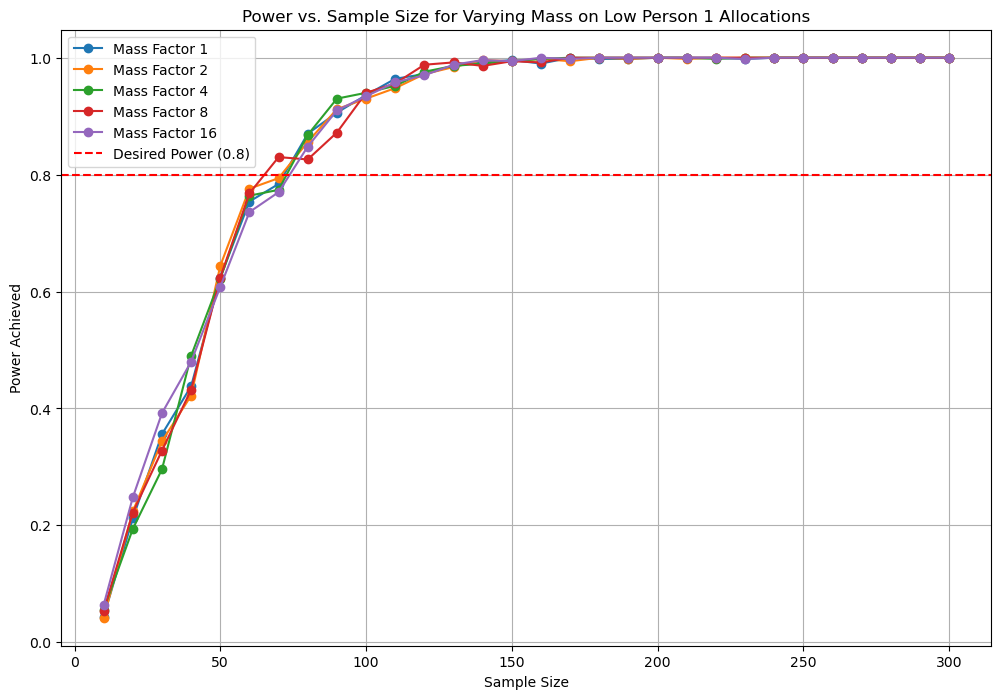

In [5]:
# Perform the analysis for the extreme prior alternative distributions
results_extreme_prior = ks_power_analysis_extreme_prior()

# Plotting for the more extreme prior cases
plt.figure(figsize=(12, 8))
for factor, sizes, powers in results_extreme_prior:
    plt.plot(sizes, powers, marker='o', linestyle='-', label=f'Mass Factor {factor}')

plt.title('Power vs. Sample Size for Varying Mass on Low Person 1 Allocations')
plt.xlabel('Sample Size')
plt.ylabel('Power Achieved')
plt.axhline(y=0.8, color='r', linestyle='--', label='Desired Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()

/Users/aaronberman/Desktop/Altruism & Lying Aversion/src/power_analysis_utils.py:163: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  _, p_value = stats.ks_2samp(null_sample, alt_sample)


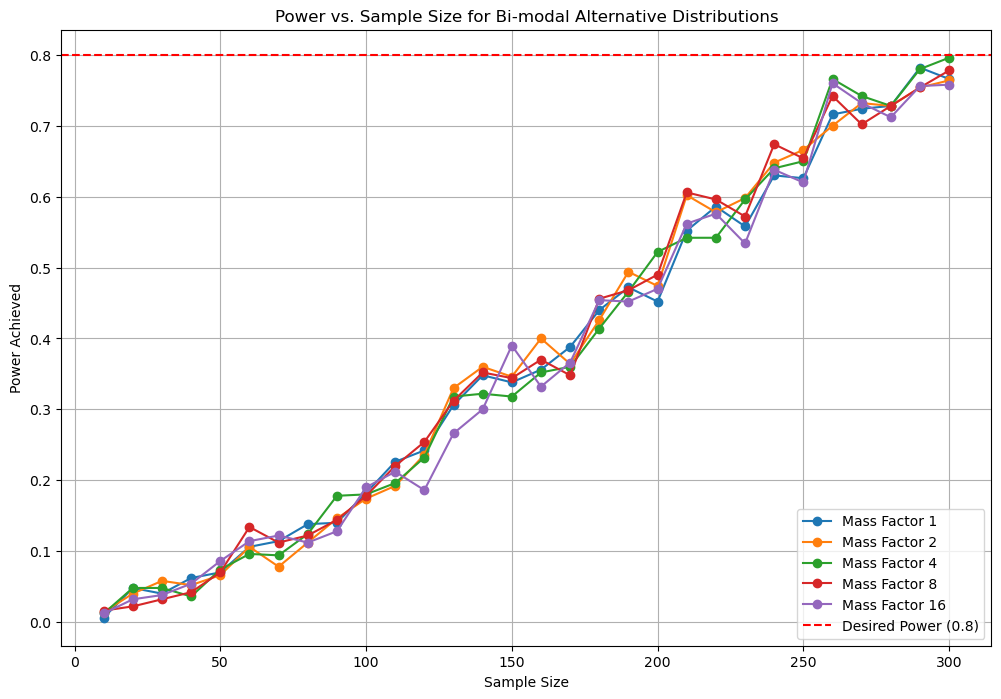

In [6]:
# Perform the analysis for the bi-modal alternative distributions
results_bimodal = ks_power_analysis_bimodal()

# Plotting for the bi-modal cases
plt.figure(figsize=(12, 8))
for factor, sizes, powers in results_bimodal:
    plt.plot(sizes, powers, marker='o', linestyle='-', label=f'Mass Factor {factor}')

plt.title('Power vs. Sample Size for Bi-modal Alternative Distributions')
plt.xlabel('Sample Size')
plt.ylabel('Power Achieved')
plt.axhline(y=0.8, color='r', linestyle='--', label='Desired Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()

## Chi-2

/Users/aaronberman/opt/anaconda3/envs/MGPGG_DA/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7407: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/aaronberman/opt/anaconda3/envs/MGPGG_DA/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7407: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


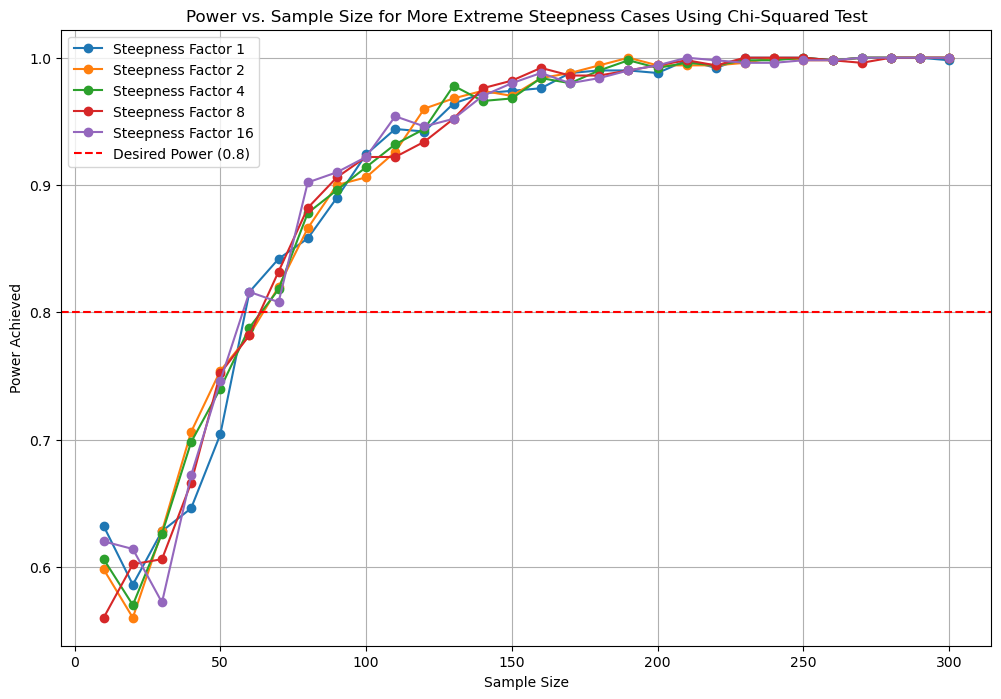

In [7]:
# Perform the analysis with more extreme steepness factors
results_extreme_cases = chi_squared_power_analysis_extreme_cases()

# Plotting for the more extreme cases
plt.figure(figsize=(12, 8))
for factor, sizes, powers in results_extreme_cases:
    plt.plot(sizes, powers, marker='o', linestyle='-', label=f'Steepness Factor {factor}')

plt.title('Power vs. Sample Size for More Extreme Steepness Cases Using Chi-Squared Test')
plt.xlabel('Sample Size')
plt.ylabel('Power Achieved')
plt.axhline(y=0.8, color='r', linestyle='--', label='Desired Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()

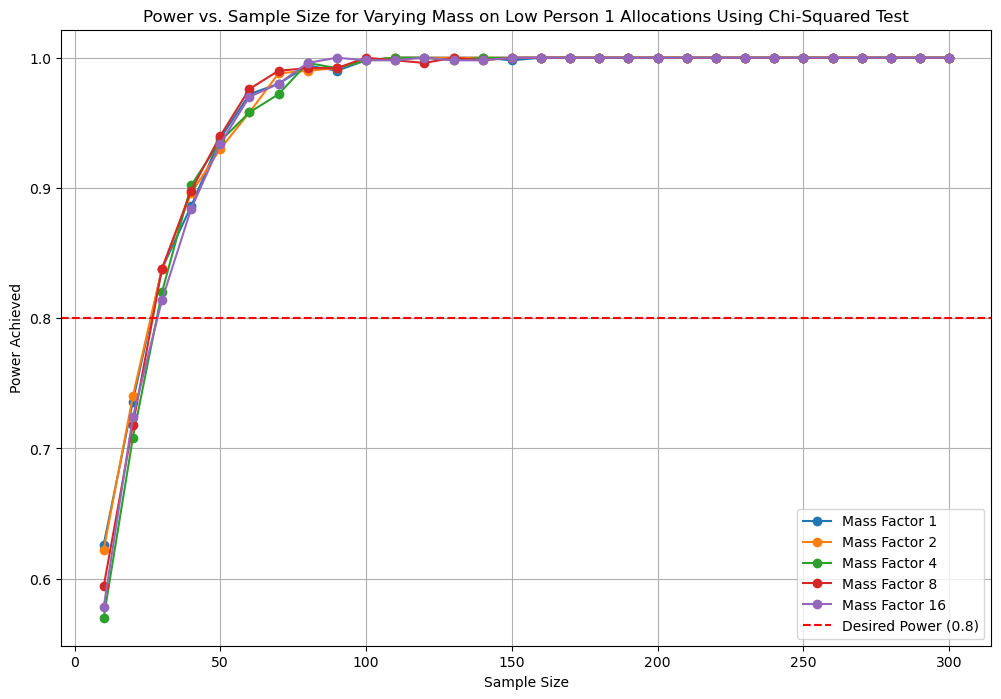

In [8]:
# Perform the analysis for the extreme prior alternative distributions
results_extreme_prior = chi_squared_power_analysis_extreme_prior()

# Plotting for the more extreme prior cases
plt.figure(figsize=(12, 8))
for factor, sizes, powers in results_extreme_prior:
    plt.plot(sizes, powers, marker='o', linestyle='-', label=f'Mass Factor {factor}')

plt.title('Power vs. Sample Size for Varying Mass on Low Person 1 Allocations Using Chi-Squared Test')
plt.xlabel('Sample Size')
plt.ylabel('Power Achieved')
plt.axhline(y=0.8, color='r', linestyle='--', label='Desired Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()

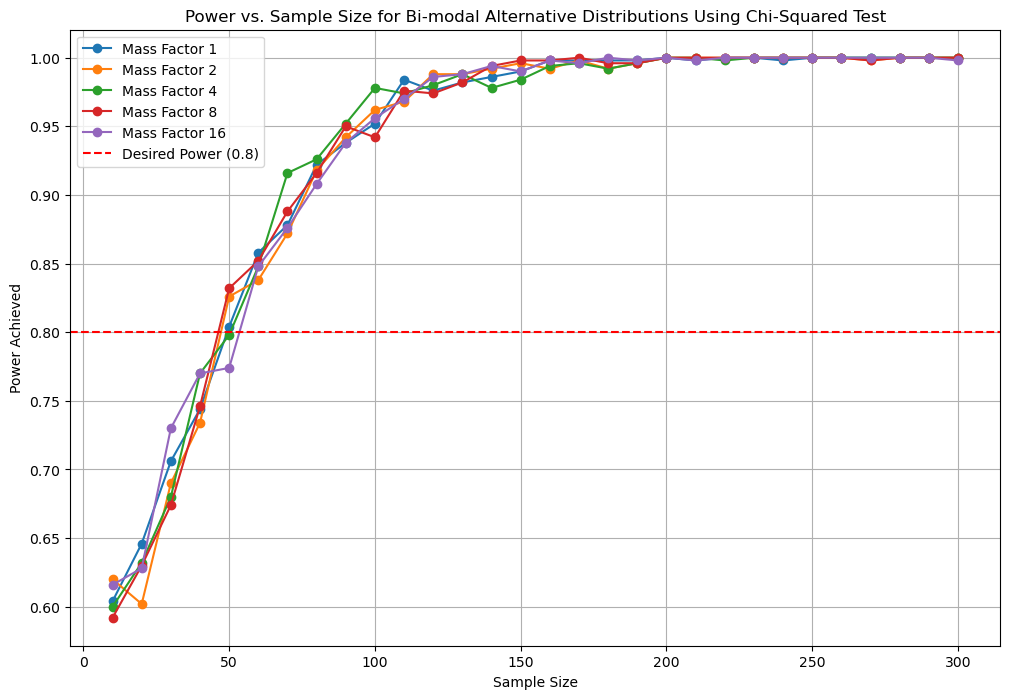

In [9]:
# Perform the analysis for the bi-modal alternative distributions
results_bimodal = chi_squared_power_analysis_bimodal()

# Plotting for the bi-modal cases
plt.figure(figsize=(12, 8))
for factor, sizes, powers in results_bimodal:
    plt.plot(sizes, powers, marker='o', linestyle='-', label=f'Mass Factor {factor}')

plt.title('Power vs. Sample Size for Bi-modal Alternative Distributions Using Chi-Squared Test')
plt.xlabel('Sample Size')
plt.ylabel('Power Achieved')
plt.axhline(y=0.8, color='r', linestyle='--', label='Desired Power (0.8)')
plt.legend()
plt.grid(True)
plt.show()